In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import silhouette_score,ConfusionMatrixDisplay,accuracy_score,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [64]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    #Outliers
    low,high = df["person_age"].quantile([0.0000000,0.9998778])
    mask_area = df["person_age"].between(low, high)
    df = df[mask_area]
    return df

In [65]:
df=wrangle(r"C:\Users\kelvin\OneDrive\Desktop\file1\credit_risk_dataset_training.csv")
print(df.shape)
df.head()             

(22847, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3


In [197]:
y= "loan_status"
y_train = df[y]
X_train = df.drop(columns = y)
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)

X_train: (22844, 11)
y_train: (22844,)


In [198]:
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline,Pipeline

In [160]:
model = make_pipeline(OneHotEncoder(use_cat_names=True),
                      SimpleImputer(),
                     LogisticRegression(),
                      #StandardScaler()
                     )
# Fit model
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['person_home_ownership', 'loan_intent',
                                     'loan_grade',
                                     'cb_person_default_on_file'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

In [161]:
Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=["person_home_ownership","loan_intent","loan_grade","cb_person_default_on_file"], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),('logisticregression',LogisticRegression())])


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['person_home_ownership', 'loan_intent',
                                     'loan_grade',
                                     'cb_person_default_on_file'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

In [164]:
acc_train = model.score(X_train,y_train)
#acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
#print("Test Accuracy:", round(acc_test, 4))
print("Training Accuracy:", round(acc_train, 4))
#print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.8042
Training Accuracy: 0.8042


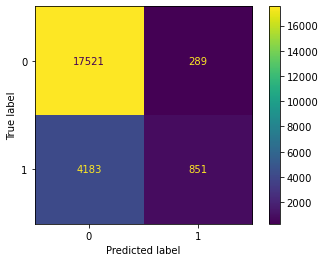

In [162]:
ConfusionMatrixDisplay.from_estimator(model,X_train,y_train)

In [166]:
from sklearn.metrics import classification_report

In [168]:
# Print classification report
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     17810
           1       0.75      0.17      0.28      5034

    accuracy                           0.80     22844
   macro avg       0.78      0.58      0.58     22844
weighted avg       0.79      0.80      0.75     22844



In [174]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [175]:
df1 = pd.read_csv(r'C:\Users\kelvin\OneDrive\Desktop\file1\credit_risk_dataset_test.csv')
print(df1.shape)
df1.head()

df1["person_emp_length"].fillna( method ='ffill', inplace = True)
df1["loan_int_rate"].fillna( method ='ffill', inplace = True)

ler =preprocessing.LabelEncoder()
df1["person_home_ownership"] = ler.fit_transform(df1["person_home_ownership"])
df1["loan_intent"] = ler.fit_transform(df1["loan_intent"])
df1["loan_grade"] = ler.fit_transform(df1["loan_grade"])
df1["cb_person_default_on_file"] = ler.fit_transform(df1["cb_person_default_on_file"])

(9731, 12)


In [176]:
target = 'loan_status'
X = df.drop(columns = target)
y = df[target]

print("X:",X.shape)
print("y:",y.shape)

X: (22844, 11)
y: (22844,)


In [178]:
df1 = df1.drop(columns = "loan_status")
df1.shape

(9731, 11)

D:\Stats_software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


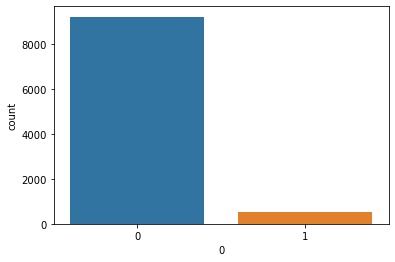

In [179]:
y_pred = model.predict(df1)
y_pred_data =pd.DataFrame(y_pred)
sns.countplot(y_pred_data[0]);

In [187]:
confusion_matrix(y.head(9731),y_pred)

array([[7133,  369],
       [2092,  137]], dtype=int64)

In [188]:
# Print classification report
print(classification_report(y_train.head(9731), y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85      7502
           1       0.27      0.06      0.10      2229

    accuracy                           0.75      9731
   macro avg       0.52      0.51      0.48      9731
weighted avg       0.66      0.75      0.68      9731



In [199]:
X_train,X_test,y_test,y_test = train_test_split(X_train,y_train,test_size = 0.3,random_state = 42)

In [203]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      5335
           1       0.76      0.16      0.27      1519

    accuracy                           0.80      6854
   macro avg       0.79      0.58      0.58      6854
weighted avg       0.80      0.80      0.75      6854



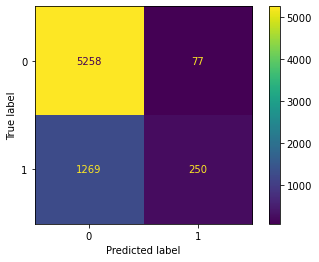

In [205]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)